### Montar Drive

In [1]:
# Montar Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Importaciones necesarias

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

### Cargar dataset final

In [3]:
# Cargar el archivo CSV desde la ruta en Google Drive
df_socieconomico_final = pd.read_csv('/content/drive/MyDrive/analytics_data_proyect/CSV_finales/df_socieconomico_final.csv')

df_violencia_kmeans = pd.read_csv('/content/drive/MyDrive/analytics_data_proyect/CSV_finales/resultados_kmeans_violencia.csv')

# Revisar forma de df
print(df_socieconomico_final.shape)
df_violencia_kmeans.shape

(42, 25)


(42, 18)

In [4]:
df_socieconomico_final.columns

Index(['poblacion', 'ha_under_illegal_explotation', 'ha_condicionada_upra',
       'ha_no_condicionada_upra', 'desempleo_cens_2018',
       'tasa_alfab_cens_2018', 'porc_est_1_cens_2018', 'porc_est_2_cens_2018',
       'cobertura_neta_mined', 'desercion_mined', 'aprobacion_mined',
       'tasa_mort_general_minsal', 'tasa_mort_ninez_minsal',
       'porc_bajo_peso_nacer_minsal', 'per_ipm_sisben',
       'per_haci_critico_sisben', 'viviendas_sisbenizados',
       'atencion_inf_prescolar', 'tasa_afiliacion_salud',
       'indice_condiciones_vivienda', 'ha_coca_cultivada_minjust',
       'codigo_dane', 'geometria_mpio', 'geometria_cabecera',
       'nombre_municipio'],
      dtype='object')

In [5]:
var_socioeconomicas = ['poblacion',
 'ha_under_illegal_explotation',
 'ha_condicionada_upra',
 'ha_no_condicionada_upra',
 'desempleo_cens_2018',
 'tasa_alfab_cens_2018',
 'porc_est_1_cens_2018',
 'porc_est_2_cens_2018',
 'cobertura_neta_mined',
 'desercion_mined',
 'aprobacion_mined',
 'tasa_mort_general_minsal',
 'tasa_mort_ninez_minsal',
 'porc_bajo_peso_nacer_minsal',
 'per_ipm_sisben',
 'per_haci_critico_sisben',
 'viviendas_sisbenizados',
 'atencion_inf_prescolar',
 'tasa_afiliacion_salud',
 'indice_condiciones_vivienda',
 'ha_coca_cultivada_minjust']

set(var_socioeconomicas) - set(df_socieconomico_final.columns)

set()

In [6]:
len(var_socioeconomicas)

21

In [7]:
df_violencia_kmeans.columns

Index(['armas_confis_polinal_tasa', 'indice_criminalidad_general_tasa',
       'indice_narcotrafico_tasa', 'total_reclam_rest_tierr_minagr_tasa',
       'vict_fuerza_pub_mindef_tasa', 'vict_por_declarac_uv_tasa',
       'codigo_dane', 'geometria_mpio', 'geometria_cabecera',
       'nombre_municipio', 'is_anomalous', 'cluster', 'silhouette',
       'cluster_pca', 'PCA_1', 'PCA_2', 'silhouette_pca',
       'cluster_pca_exc_anom'],
      dtype='object')

In [8]:
var_violencia = ['armas_confis_polinal_tasa',
 'indice_criminalidad_general_tasa',
 'indice_narcotrafico_tasa',
 'total_reclam_rest_tierr_minagr_tasa',
 'vict_fuerza_pub_mindef_tasa',
 'vict_por_declarac_uv_tasa']

set(var_violencia) - set(df_violencia_kmeans)

set()

In [9]:
df_violencia_kmeans[['nombre_municipio', 'is_anomalous', 'cluster', 'cluster_pca', 'cluster_pca_exc_anom']].head()

,nombre_municipio,is_anomalous,cluster,cluster_pca,cluster_pca_exc_anom
0,POPAYAN,0,0,0,0
1,ALMAGUER,0,1,3,1
2,ARGELIA,1,2,2,Anomalo
3,BALBOA,0,1,0,1
4,BOLIVAR,0,1,3,1


-  Selección y Escalado de Variables Predictoras

In [10]:
# Seleccionar las variables socioeconómicas de df_socieconomico_final
X = df_socieconomico_final[var_socioeconomicas]

# Escalar las variables para ajustar sus unidades y magnitudes
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

-  Definir las Etiquetas de los Clusters como Variable de Salida

In [11]:
# Definir las etiquetas de clusters como variable de salida
y = df_violencia_kmeans['cluster_pca_exc_anom']

- Entrenamiento del Modelo de Regresión Logística Multietiqueta

In [12]:
from sklearn.linear_model import LogisticRegression

# Crear y entrenar el modelo de regresión logística
model = LogisticRegression(multi_class='multinomial', max_iter=1000, random_state=42)
model.fit(X_scaled, y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=42)

- Análisis de Coeficientes e Interpretación de Resultados

Coeficientes de cada variable en la predicción de perfiles de violencia:


,poblacion,ha_under_ill,ha_condicion,ha_no_condic,desempleo_ce,tasa_alfab_c,porc_est_1_c,porc_est_2_c,cobertura_ne,desercion_mi,aprobacion_m,tasa_mort_ge,tasa_mort_ni,porc_bajo_pe,per_ipm_sisb,per_haci_cri,viviendas_si,atencion_inf,tasa_afiliac,indice_condi,ha_coca_cult
0,0.879040,0.516359,-0.272861,-0.031873,-0.095381,-0.675605,0.224859,-0.111014,-0.254645,0.393438,0.212366,-0.254598,-0.009787,-0.065491,-0.095379,0.454888,-0.685467,0.396503,-0.486185,0.244443,-0.052179
1,0.122116,-0.534787,0.019132,0.355078,-0.022615,-0.423432,0.093188,-0.199177,-0.938839,-0.534308,-0.829476,0.390204,0.503769,-0.273222,0.034638,-0.513024,-0.025894,0.411073,0.205607,-1.091261,0.019493
2,-0.380700,-0.109155,0.313213,-0.295816,0.058438,-0.207926,-0.323959,0.043277,0.428819,-0.436773,0.309086,0.480471,-0.119566,-0.593218,-0.103109,-0.036390,0.232318,-0.324838,0.121808,0.130223,-0.349525
3,-0.237236,0.165633,-0.027535,0.221697,0.363708,1.173427,0.210810,-0.250629,0.090957,0.723644,-0.209806,-0.585017,-0.155029,0.287909,-0.107115,0.333309,0.392250,-0.254309,-0.137493,0.756089,-0.211703
Anomalo,-0.383220,-0.038050,-0.031949,-0.249087,-0.304150,0.133535,-0.204899,0.517543,0.673708,-0.146001,0.517831,-0.031060,-0.219387,0.644022,0.270965,-0.238784,0.086793,-0.228429,0.296263,-0.039493,0.593914


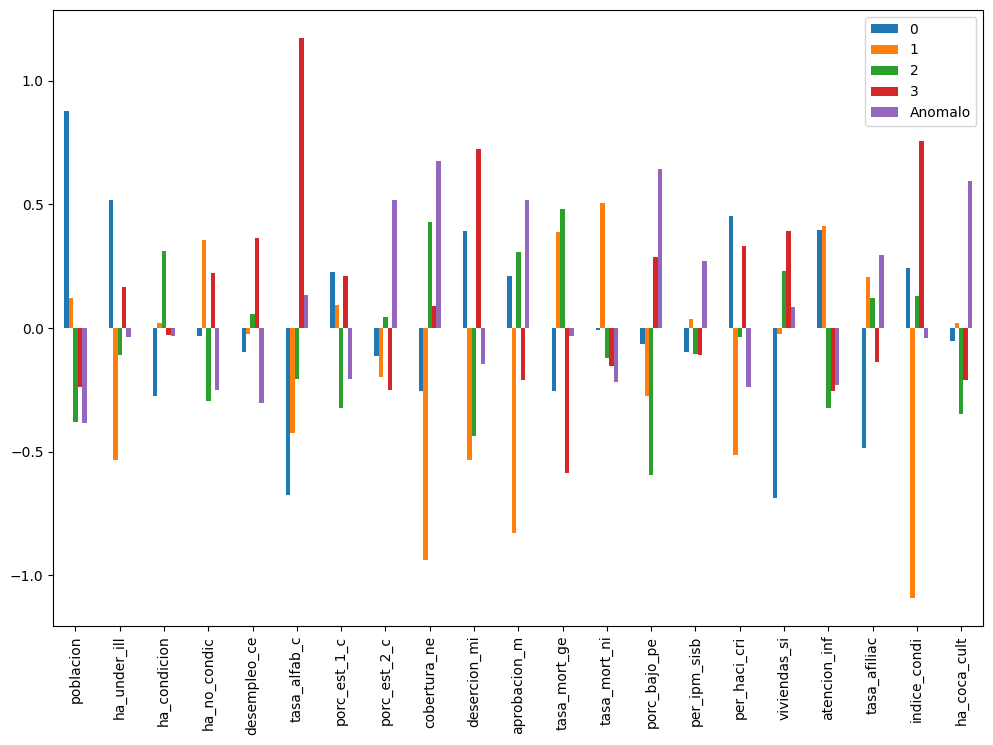

In [13]:
# Mostrar todas las columnas del DataFrame
pd.set_option('display.max_columns', None)

# Obtener y visualizar los coeficientes del modelo
coef_df = pd.DataFrame(model.coef_, columns=[col[:12] for col in var_socioeconomicas], index=model.classes_)
coef_df.T.plot(kind='bar', figsize=(12, 8))

# Imprimir los coeficientes para interpretar
print("Coeficientes de cada variable en la predicción de perfiles de violencia:")
coef_df

- Visualización de Odd Ratios

<Figure size 1200x800 with 0 Axes>

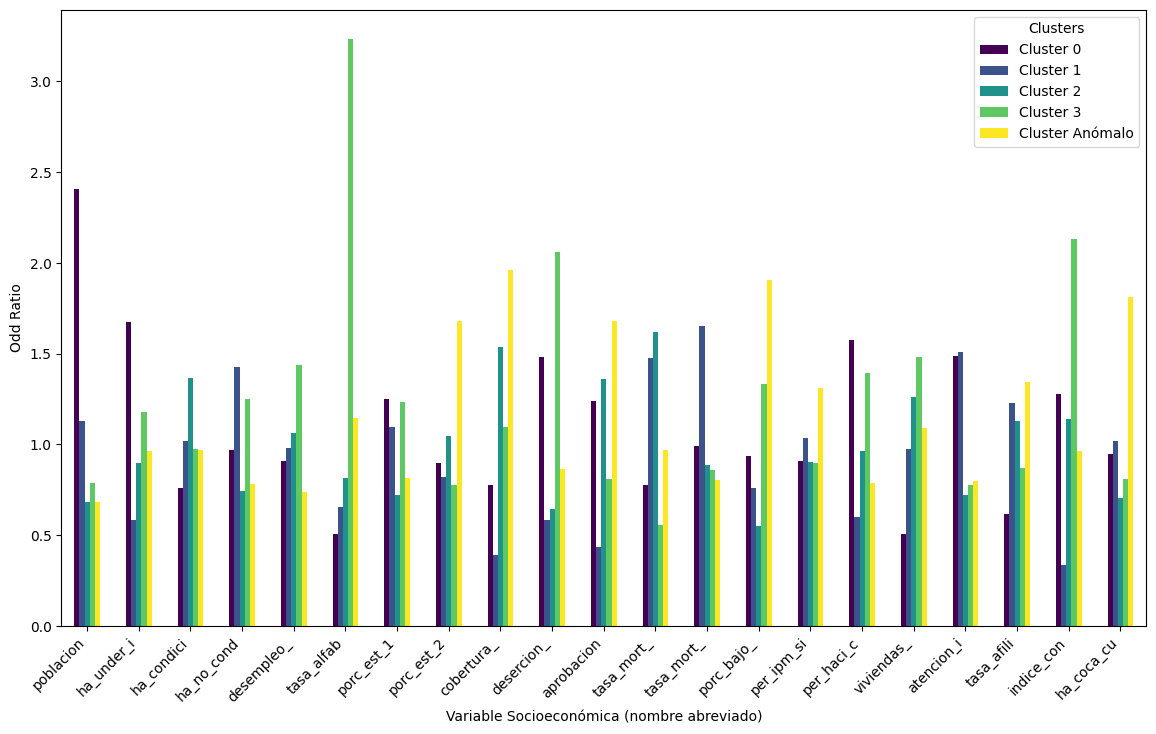


Odds Ratios:


,poblacion,ha_under_i,ha_condici,ha_no_cond,desempleo_,tasa_alfab,porc_est_1,porc_est_2,cobertura_,desercion_,aprobacion,tasa_mort_,tasa_mort_,porc_bajo_,per_ipm_si,per_haci_c,viviendas_,atencion_i,tasa_afili,indice_con,ha_coca_cu
Cluster 0,2.408586,1.675915,0.761199,0.968630,0.909026,0.508849,1.252147,0.894926,0.775192,1.482067,1.236601,0.775228,0.990261,0.936607,0.909029,1.575998,0.503855,1.486618,0.614968,1.276909,0.949159
Cluster 1,1.129886,0.585794,1.019316,1.426292,0.977639,0.654796,1.097668,0.819405,0.391082,0.586075,0.436278,1.477282,1.654947,0.760924,1.035244,0.598682,0.974439,1.508436,1.228270,0.335793,1.019684
Cluster 2,0.683383,0.896591,1.367812,0.743925,1.060179,0.812267,0.723280,1.044227,1.535443,0.646118,1.362179,1.616836,0.887305,0.552546,0.902029,0.964264,1.261520,0.722644,1.129537,1.139082,0.705023
Cluster 3,0.788805,1.180140,0.972840,1.248193,1.438655,3.233053,1.234678,0.778311,1.095221,2.061934,0.810741,0.557096,0.856390,1.333636,0.898422,1.395579,1.480308,0.775452,0.871541,2.129929,0.809205
Cluster Anómalo,0.681663,0.962665,0.968556,0.779512,0.737750,1.142862,0.814730,1.677901,1.961497,0.864157,1.678383,0.969417,0.803011,1.904124,1.311229,0.787585,1.090671,0.795783,1.344824,0.961276,1.811064


In [18]:
# Coeficientes y nombres de variables
coefficients = model.coef_
odd_ratios = np.exp(coefficients)  # Calcular Odd Ratios

# Limitar el nombre de las variables a los primeros 10 caracteres
short_var_names = [var[:10] for var in var_socioeconomicas]

# Crear DataFrame para odd ratios con nombres cortos
odds_df = pd.DataFrame(odd_ratios, columns=short_var_names, index=['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster Anómalo'])

# Graficar Odd Ratios
plt.figure(figsize=(12, 8))
odds_df.T.plot(kind='bar', figsize=(14, 8), colormap='viridis')
plt.ylabel('Odd Ratio')
plt.xlabel('Variable Socioeconómica (nombre abreviado)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Clusters')
plt.show()

# Mostrar Odd Ratios
print("\nOdds Ratios:")
odds_df

- Evaluacion

In [15]:
from sklearn.metrics import classification_report, accuracy_score

# Predecir los perfiles de violencia en los datos de entrenamiento
y_pred = model.predict(X_scaled)

# Evaluar el rendimiento del modelo
print("Evaluación del Modelo de Regresión Logística:")
print(classification_report(y, y_pred, target_names=[f"Cluster {c}" for c in model.classes_]))
print(f"Exactitud global del modelo: {accuracy_score(y, y_pred):.2f}")

Evaluación del Modelo de Regresión Logística:
                 precision    recall  f1-score   support

      Cluster 0       1.00      0.86      0.92         7
      Cluster 1       0.94      1.00      0.97        17
      Cluster 2       1.00      1.00      1.00         2
      Cluster 3       1.00      1.00      1.00        13
Cluster Anomalo       1.00      1.00      1.00         3

       accuracy                           0.98        42
      macro avg       0.99      0.97      0.98        42
   weighted avg       0.98      0.98      0.98        42

Exactitud global del modelo: 0.98


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Dividir los datos en conjuntos de entrenamiento (80%) y validación (20%)
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Crear y entrenar el modelo de regresión logística
model = LogisticRegression(multi_class='multinomial', max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Predicciones en el conjunto de validación
y_val_pred = model.predict(X_val)

# Evaluación del modelo en el conjunto de validación
print("Evaluación del Modelo en Conjunto de Validación")
print("Clasificación:")
print(classification_report(y_val, y_val_pred))
print(f"Exactitud en Validación: {accuracy_score(y_val, y_val_pred):.2f}")

# Mostrar coeficientes para interpretación
coef_df = pd.DataFrame(model.coef_, columns=X.columns, index=model.classes_)
print("\nCoeficientes del modelo en cada clase de violencia:")
coef_df

In [ ]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import precision_recall_fscore_support

# Crear el modelo de regresión logística
model = LogisticRegression(multi_class='multinomial', max_iter=1000, random_state=42)

# Validación cruzada de 5 pliegues y evaluación de exactitud en cada pliegue
cv_accuracy_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy')
print(f"\nExactitud promedio (Validación Cruzada 5 Pliegues): {cv_accuracy_scores.mean():.2f}")
print(f"Desviación estándar de la exactitud: {cv_accuracy_scores.std():.2f}")

# Predicciones de validación cruzada y cálculo de métricas adicionales
y_cv_pred = cross_val_predict(model, X_scaled, y, cv=5)
precision, recall, f1, _ = precision_recall_fscore_support(y, y_cv_pred, average='weighted')

print("\nEvaluación del Modelo (Validación Cruzada)")
print(f"Precisión ponderada: {precision:.2f}")
print(f"Recall ponderado: {recall:.2f}")
print(f"F1-score ponderado: {f1:.2f}")

# Entrenar el modelo en todos los datos y mostrar coeficientes para interpretación
model.fit(X_scaled, y)
coef_df = pd.DataFrame(model.coef_, columns=X.columns, index=model.classes_)
print("\nCoeficientes del modelo en cada clase de violencia:")
coef_df